# Importing necessary libraries

In [45]:
import pandas as pd
import numpy as np
import pylab as pl
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline
import matplotlib.pyplot as plt

### Reading the CSV File from user for training our model with past inputs and prediction

In [46]:
df  = pd.read_csv("RockvsMine.csv")
df.head()

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,...,C52,C53,C54,C55,C56,C57,C58,C59,C60,C61
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,0
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,0
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,0
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,0
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,0


In [48]:
df.dtypes

C1     float64
C2     float64
C3     float64
C4     float64
C5     float64
        ...   
C57    float64
C58    float64
C59    float64
C60    float64
C61      int64
Length: 61, dtype: object

### Taking the 60 columns as input for model and last for output

In [49]:
x = df.loc[:,df.columns != 'C61']
x.head(10)

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,...,C51,C52,C53,C54,C55,C56,C57,C58,C59,C60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094
5,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0104,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062
6,0.0317,0.0956,0.1321,0.1408,0.1674,0.1710,0.0731,0.1401,0.2083,0.3513,...,0.0195,0.0201,0.0248,0.0131,0.0070,0.0138,0.0092,0.0143,0.0036,0.0103
7,0.0519,0.0548,0.0842,0.0319,0.1158,0.0922,0.1027,0.0613,0.1465,0.2838,...,0.0052,0.0081,0.0120,0.0045,0.0121,0.0097,0.0085,0.0047,0.0048,0.0053
8,0.0223,0.0375,0.0484,0.0475,0.0647,0.0591,0.0753,0.0098,0.0684,0.1487,...,0.0061,0.0145,0.0128,0.0145,0.0058,0.0049,0.0065,0.0093,0.0059,0.0022
9,0.0164,0.0173,0.0347,0.0070,0.0187,0.0671,0.1056,0.0697,0.0962,0.0251,...,0.0118,0.0090,0.0223,0.0179,0.0084,0.0068,0.0032,0.0035,0.0056,0.0040


In [50]:
y = df['C61']
y.head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: C61, dtype: int64

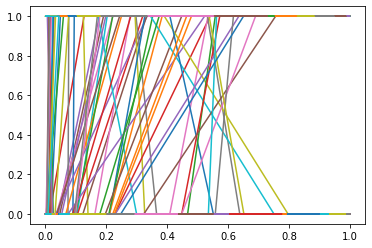

In [51]:
plt.plot(x,y)
plt.show()

# Model -> Logistic Regression 

### Transforming our input to normalize or dataset

In [52]:
from sklearn import preprocessing as pp
x = pp.StandardScaler().fit(x).transform(x)
x

array([[-0.4 , -0.04, -0.03, ...,  0.07,  0.17, -0.66],
       [ 0.7 ,  0.42,  1.06, ..., -0.47, -0.44, -0.42],
       [-0.13,  0.6 ,  1.72, ...,  1.31,  0.25,  0.26],
       ...,
       [ 1.  ,  0.16, -0.67, ...,  0.91, -0.04, -0.68],
       [ 0.05, -0.1 ,  0.13, ..., -0.01, -0.7 , -0.34],
       [-0.14, -0.06, -0.79, ..., -0.67, -0.3 ,  0.99]])

### Creating a training and testing set

In [53]:
from sklearn.model_selection import train_test_split as tts
train_x, test_x, train_y, test_y = tts(x,y,test_size = 0.2, random_state = 5)

In [54]:
print(train_x.shape,train_y.shape,test_x.shape,test_y.shape)

(166, 60) (166,) (42, 60) (42,)


In [55]:
from sklearn.linear_model import LogisticRegression as lr
from sklearn.metrics import confusion_matrix
LR = lr(C=0.01, solver = 'liblinear').fit(train_x,train_y)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [56]:
y_ = LR.predict(test_x)
y_

array([1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0],
      dtype=int64)

### Checking the jaccard score for accuracy

In [57]:
from sklearn.metrics import jaccard_score as js
js(test_y,y_,pos_label = 0)

0.6818181818181818

### Using confusion matrix for visual representation of accuracy

In [58]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(test_y, y_, labels=[1,0]))

[[20  7]
 [ 0 15]]


Confusion matrix, without normalization
[[20  7]
 [ 0 15]]


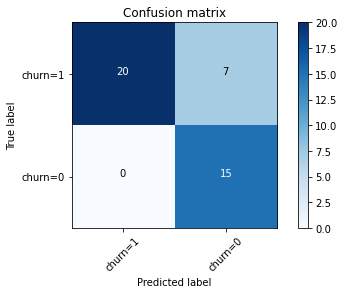

In [59]:
cnf_matrix = confusion_matrix(test_y, y_, labels = [1,0])
np.set_printoptions(precision = 2)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

### Getting the classification report of our Logistic Regression Model

In [60]:
print(classification_report(test_y,y_))

              precision    recall  f1-score   support

           0       0.68      1.00      0.81        15
           1       1.00      0.74      0.85        27

    accuracy                           0.83        42
   macro avg       0.84      0.87      0.83        42
weighted avg       0.89      0.83      0.84        42



### Making a predictive system by getting input vector from user

In [61]:
input_data = (0.0307,0.0523,0.0653,0.0521,0.0611,0.0577,0.0665,0.0664,0.1460,0.2792,0.3877,0.4992,0.4981,0.4972,0.5607,0.7339,0.8230,0.9173,0.9975,0.9911,0.8240,0.6498,0.5980,0.4862,0.3150,0.1543,0.0989,0.0284,0.1008,0.2636,0.2694,0.2930,0.2925,0.3998,0.3660,0.3172,0.4609,0.4374,0.1820,0.3376,0.6202,0.4448,0.1863,0.1420,0.0589,0.0576,0.0672,0.0269,0.0245,0.0190,0.0063,0.0321,0.0189,0.0137,0.0277,0.0152,0.0052,0.0121,0.0124,0.0055)
input_data = np.array(input_data)
input_data = input_data.reshape(1,-1)
predict_out = LR.predict(input_data)
print(predict_out)

[1]


In [62]:
if predict_out[0] == 1:
    print("The object is a Mine")
else:
    print("The  object is a Rock")

The object is a Mine
